# Проект: Восстановление золота из руды

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Работа-с-данными" data-toc-modified-id="Работа-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Работа с данными</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Знакомимся-с-данными" data-toc-modified-id="Знакомимся-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Знакомимся с данными</a></span></li><li><span><a href="#Проверяем-с-МАЕ" data-toc-modified-id="Проверяем-с-МАЕ-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверяем с МАЕ</a></span></li><li><span><a href="#Смотрим-на-признаки" data-toc-modified-id="Смотрим-на-признаки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Смотрим на признаки</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Предобработка</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследуем-распределение-концетрации-металлов-на-каждой-стадии-обработки" data-toc-modified-id="Исследуем-распределение-концетрации-металлов-на-каждой-стадии-обработки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем распределение концетрации металлов на каждой стадии обработки</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья-в-тренирвочной-и-тествоой-выборках" data-toc-modified-id="Распределение-размеров-гранул-сырья-в-тренирвочной-и-тествоой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья в тренирвочной и тествоой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-металлов" data-toc-modified-id="Суммарная-концентрация-металлов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация металлов</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функции-для-подсчета-sMAPE" data-toc-modified-id="Функции-для-подсчета-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функции для подсчета sMAPE</a></span></li><li><span><a href="#Обучим-модeли" data-toc-modified-id="Обучим-модeли-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим модeли</a></span></li></ul></li><li><span><a href="#Тест-и-выводы" data-toc-modified-id="Тест-и-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тест и выводы</a></span><ul class="toc-item"><li><span><a href="#Тест" data-toc-modified-id="Тест-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тест</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Задача
Построить модель, которая  должна предсказать коэффициент восстановления золота из золотосодержащей руды.
Желаемый результат: Модель должна помочь оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

# План
1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

# Стек
pandas, numpy, matplotlib и sklearn.

## Работа с данными

### Подготовка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.utils import shuffle

In [2]:
pd.options.display.float_format ='{:,.6f}'.format

In [3]:
state = 12345

### Знакомимся с данными 

In [4]:
try:
    gold_train = pd.read_csv('/datasets/gold_industry_train.csv')
    gold_test = pd.read_csv('/datasets/gold_industry_test.csv')
    gold_full = pd.read_csv('/datasets/gold_industry_full.csv')
except: 
    gold_train = pd.read_csv("C:/Users/gorok/Desktop/datasets/gold_industry_train.csv")
    gold_test = pd.read_csv("C:/Users/gorok/Desktop/datasets/gold_industry_test.csv")
    gold_full = pd.read_csv("C:/Users/gorok/Desktop/datasets/gold_industry_full.csv")

In [5]:
print(gold_train.info())
gold_train.set_index('date', inplace=True)
gold_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,"1,000.286398",-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,-400.599524,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,-399.353521,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,"1,000.166602",-400.556601,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,"1,000.026864",-399.968583,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948


In [6]:
print(gold_test.info())
gold_test.set_index('date', inplace=True)
gold_test.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,"1,196.238112",-299.862743,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,"1,201.904177",-299.907308,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,"1,200.826926",-300.124116,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,"1,199.292489",-299.778385,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,"1,198.005449",-300.283401,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
2017-12-09 19:59:59,5.848338,6.234198,4.468803,37.816555,547.515088,85.875864,8.040386,7.500718,"1,201.408796",-299.647294,...,22.977833,-499.910098,20.000113,-500.584093,18.003899,-500.326371,12.978611,-499.966502,19.988673,-500.742891
2017-12-09 20:59:59,6.172839,6.213598,4.458071,36.829223,518.363800,73.426294,7.641859,7.498470,"1,198.551240",-300.152108,...,22.964590,-500.083299,20.010567,-500.545746,18.040164,-498.936442,12.988702,-499.985412,20.014155,-499.443855
2017-12-09 21:59:59,5.743825,6.264367,4.428267,37.170131,500.494798,75.915232,7.230213,7.496599,"1,201.172468",-300.089700,...,23.010484,-500.498525,20.043525,-499.701442,17.991164,-500.324632,13.000809,-500.181711,20.001605,-500.229965
2017-12-09 22:59:59,5.558520,6.167472,4.370640,37.356892,540.990643,79.668503,7.089240,7.524634,"1,195.305111",-300.229149,...,22.979813,-500.451722,19.995022,-500.415107,18.057379,-499.238503,13.011922,-500.067255,20.002796,-504.347015


In [7]:
print(gold_full.info())
gold_full.set_index('date', inplace=True)
gold_full.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,"1,000.286398",-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,-400.599524,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,-399.353521,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,"1,000.166602",-400.556601,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,"1,000.026864",-399.968583,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948


### Проверяем с МАЕ

In [8]:
top = gold_train['rougher.output.concentrate_au']*(gold_train['rougher.input.feed_au']-gold_train['rougher.output.tail_au'])
bot = gold_train['rougher.input.feed_au']*(gold_train['rougher.output.concentrate_au']-gold_train['rougher.output.tail_au'])
       
mean_absolute_error(gold_train['rougher.output.recovery'],top/bot*100)

9.83758577644259e-15

Срдняя абсолютная ошибка очень маленькая, можно смело сказаать - пренебрежимо мала

### Смотрим на признаки

В пункте 1.1 видно, что в тестовом датасете нет колонок с типами параметра: calculation - некоторого рода промежуточные ответы, output - выходные данные. Эти параметры могут послужить поводом утечки целового признака, поэтому их исключили из тестовой выборки

### Предобработка

В тренировочном датасете не очень много пропусков, поэтому их можно заменить медианами значений данных признаков 

In [9]:
gold_train.isna().sum()

rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb      72
rougher.input.feed_sol     77
rougher.input.feed_rate     7
                           ..
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb       75
final.output.tail_sol       5
Length: 86, dtype: int64

In [10]:
name = gold_train.columns
for i in name:
    gold_train[i].fillna(method='bfill', inplace=True)

In [11]:
gold_train.isna().sum()

rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb      0
rougher.input.feed_sol     0
rougher.input.feed_rate    0
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       0
final.output.tail_pb       0
final.output.tail_sol      0
Length: 86, dtype: int64

В тестовых данных пропусков всего 5-6%, их вполне можно было бы удалить потому что предсказание на таких данных может сильно отличаться от дейтсвительности, что повлияет на оценку метрики, хотя общая картина может быть совершенно другой, но у нас есть третий датафрейм, который велючает в себя первый и второй датафреймы, для корректного исправления пропусков стоит выбрать один из подходов, поэтому заменить пустые значения медианными 

In [12]:
name = gold_test.columns
for i in name:
    gold_test[i].fillna(method='bfill', inplace=True)

Сделаем то же самое и для третьего датасета

In [13]:
name = gold_full.columns
for i in name:
    gold_full[i].fillna(method='bfill', inplace=True)

Создадим переменную test_target, которая будет содержать в себе ответы на тестовые задания, создаем ее сейчас, так как дальше будем редактировать тренировочную выборку

In [14]:
test_target = gold_full
test_target.drop(index=gold_train.index, axis=1, inplace=True)

## Анализ данных

### Исследуем распределение концетрации металлов на каждой стадии обработки 

In [15]:
our_list = {1:['rougher.input.feed_au',
               'rougher.output.concentrate_au',
               'primary_cleaner.output.concentrate_au',
               'final.output.concentrate_au'],
            
            2:['rougher.input.feed_ag',
               'rougher.output.concentrate_ag',
               'primary_cleaner.output.concentrate_ag',
               'final.output.concentrate_ag'],
            
            3:['rougher.input.feed_pb',
               'rougher.output.concentrate_pb',
               'primary_cleaner.output.concentrate_pb',
               'final.output.concentrate_pb']
           }

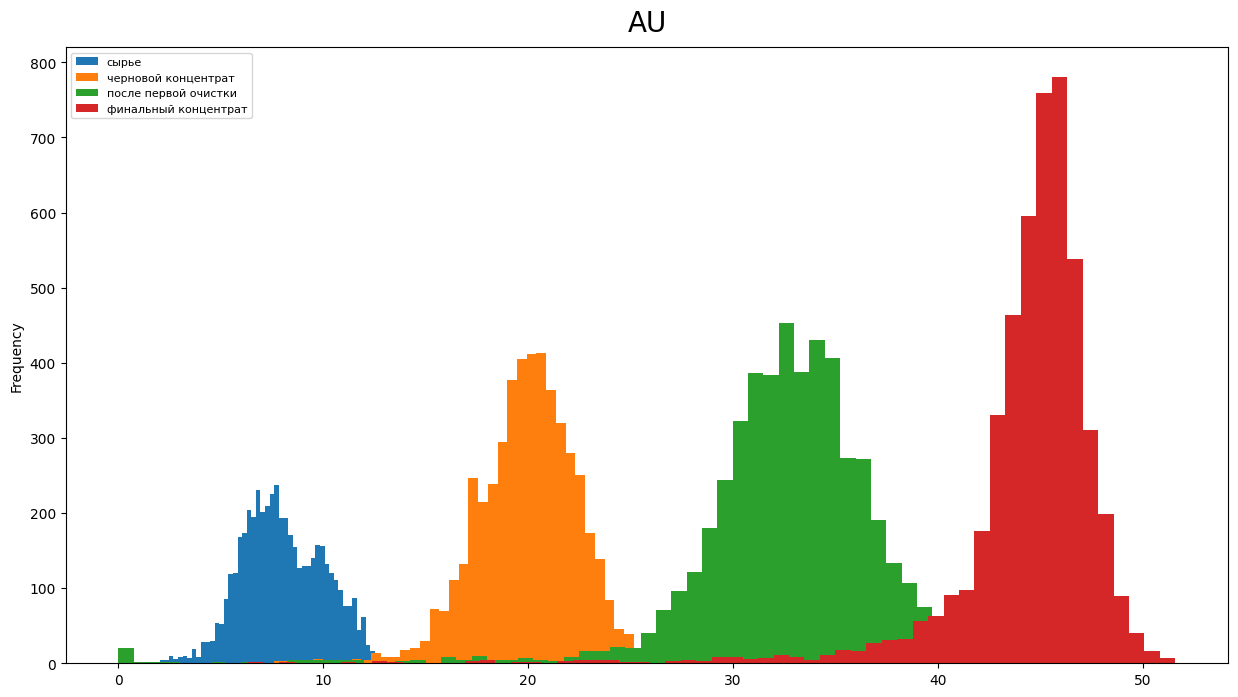

In [16]:
plt.figtext(0.5, 0.9, 'AU', fontsize=20)
gold_full[our_list[1][0]].plot(kind='hist', bins=60)
gold_full[our_list[1][1]].plot(kind='hist', bins=60)
gold_full[our_list[1][2]].plot(kind='hist', bins=60)
gold_full[our_list[1][3]].plot(kind='hist', bins=60, figsize=(15,8))
plt.legend(['сырье', 'черновой концентрат', 'после первой очистки', 'финальный концентрат'],fontsize=(8))

In [17]:
gold_train = gold_train[gold_train['rougher.input.feed_au']>2]
gold_train = gold_train[gold_train['rougher.output.concentrate_au']>2]
gold_train = gold_train[gold_train['primary_cleaner.output.concentrate_au']>2]
gold_train = gold_train[gold_train['final.output.concentrate_au']>2]

    ЗОЛОТО
Все распределния похожи на нормальные, но с некоторыми инетресностями, распределния золота в сырье - 2 пика, в остальных выбросы возле 0. Заметна тенденция на увеличение концетрации золота после каждой стадии обработки.

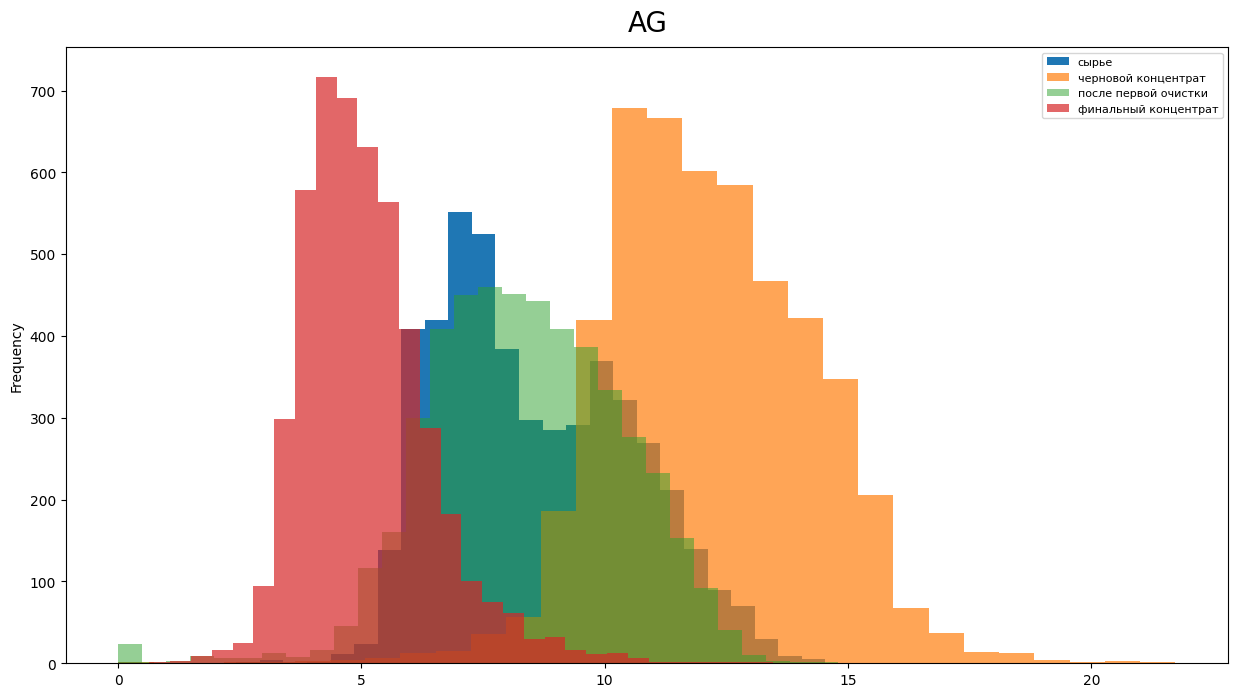

In [18]:
plt.figtext(0.5, 0.9, 'AG', fontsize=20)

gold_full[our_list[2][0]].plot(kind='hist', bins=30)
gold_full[our_list[2][1]].plot(kind='hist', bins=30, alpha=0.7)
gold_full[our_list[2][2]].plot(kind='hist', bins=30, alpha=0.5)
gold_full[our_list[2][3]].plot(kind='hist', bins=30, figsize=(15,8), alpha=0.7)
plt.legend(['сырье', 'черновой концентрат', 'после первой очистки', 'финальный концентрат'],fontsize=(8))

In [19]:
gold_train = gold_train[gold_train['rougher.input.feed_ag']>2]
gold_train = gold_train[gold_train['rougher.output.concentrate_ag']>2]
gold_train = gold_train[gold_train['primary_cleaner.output.concentrate_ag']>2]
gold_train = gold_train[gold_train['final.output.concentrate_ag']>2]

    СЕРЕБРО
Аналогичная с золотом ситуация по распределениям. Здесь нет такой явной тенденции, как с золотом, тут можно заметить, что концетрация серебра в сырье крайне похожа на концетрацию в готовом продукте 

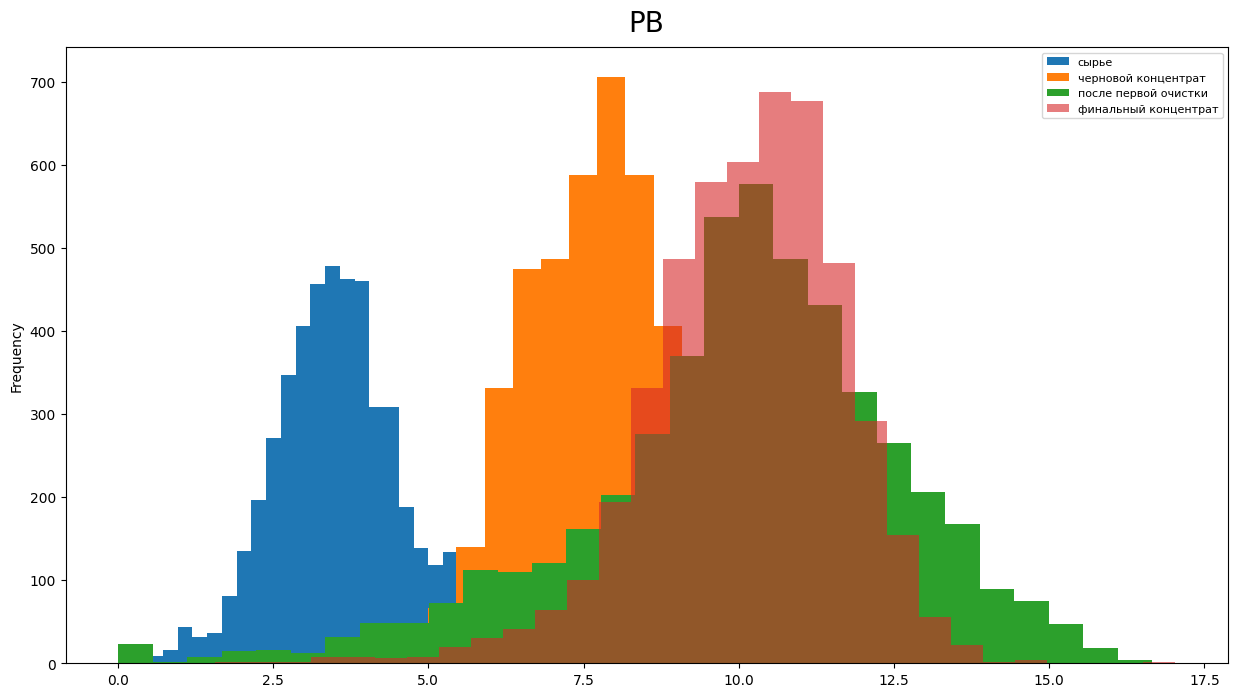

In [20]:
plt.figtext(0.5, 0.9, 'PB', fontsize=20)

gold_full[our_list[3][0]].plot(kind='hist', bins=30)
gold_full[our_list[3][1]].plot(kind='hist', bins=30)
gold_full[our_list[3][2]].plot(kind='hist', bins=30)
gold_full[our_list[3][3]].plot(kind='hist', bins=30, figsize=(15,8), alpha=0.6)
plt.legend(['сырье', 'черновой концентрат', 'после первой очистки', 'финальный концентрат'],fontsize=(8))

In [21]:
gold_train = gold_train[gold_train['rougher.input.feed_pb']>2]
gold_train = gold_train[gold_train['rougher.output.concentrate_pb']>2]
gold_train = gold_train[gold_train['primary_cleaner.output.concentrate_pb']>2]
gold_train = gold_train[gold_train['final.output.concentrate_pb']>2]

    СВИНЕЦ
Первое распределение явное нормальное, без каких-либо но. Три оставшихся распределния, как и у других металлов имеют выбросы возле нуля. Здесь, как и с золотом, проглядывается явная тенденция на увеличение концетрации с каждым ходом обработки 

### Распределение размеров гранул сырья в тренирвочной и тествоой выборках 

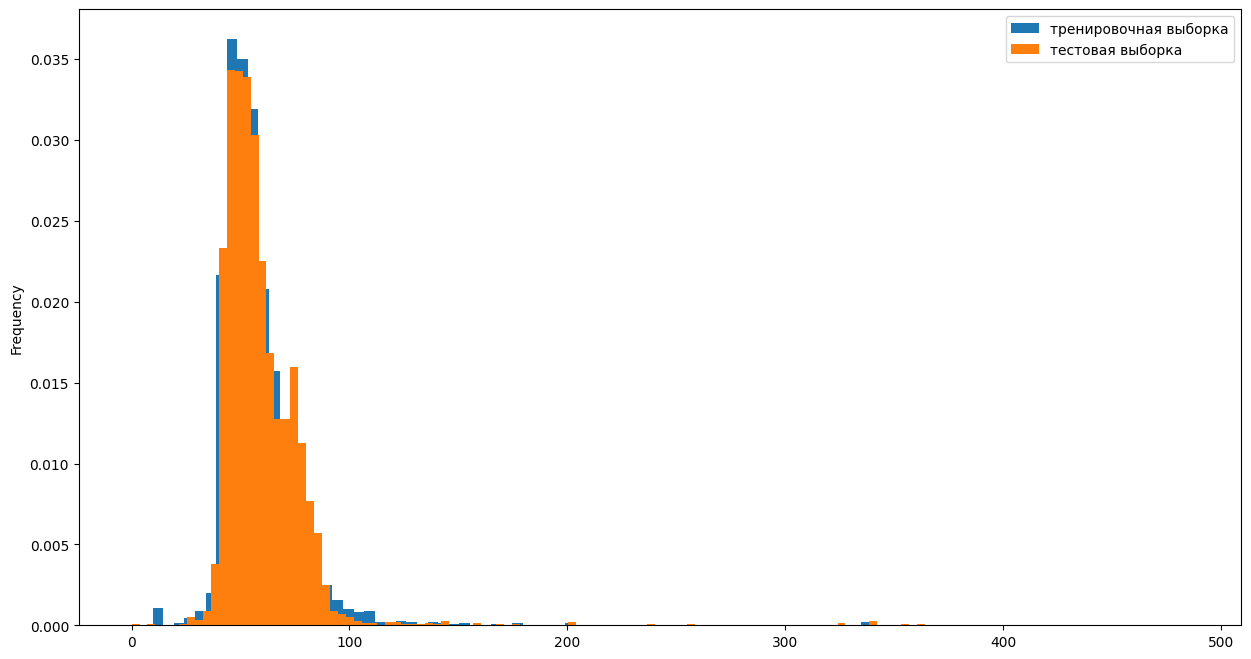

In [22]:
gold_train['rougher.input.feed_size'].plot(kind='hist', bins=100, density=True, figsize=(15,8))
gold_test['rougher.input.feed_size'].plot(kind='hist', bins=100,density=True, figsize=(15,8))
plt.legend(['тренировочная выборка', 'тестовая выборка'])

Как можем заметить, распределения очень похожи, хотя в тестовой выборке есть какие то шумы, вполне вероятно, что это все из-за сильно меньшего числа наблюдений, чем в тренировочной 

### Суммарная концентрация металлов

In [23]:
sum_conc_au = (gold_full['rougher.input.feed_au'] + gold_full['rougher.output.concentrate_au'] +
gold_full['primary_cleaner.output.concentrate_au'] + gold_full['final.output.concentrate_au'])

sum_conc_ag = (gold_full['rougher.input.feed_ag'] + gold_full['rougher.output.concentrate_ag'] +
gold_full['primary_cleaner.output.concentrate_ag'] + gold_full['final.output.concentrate_ag'])

sum_conc_pb = (gold_full['rougher.input.feed_pb'] + gold_full['rougher.output.concentrate_pb'] +
gold_full['primary_cleaner.output.concentrate_pb'] + gold_full['final.output.concentrate_pb'])

Text(0, 0.5, '')

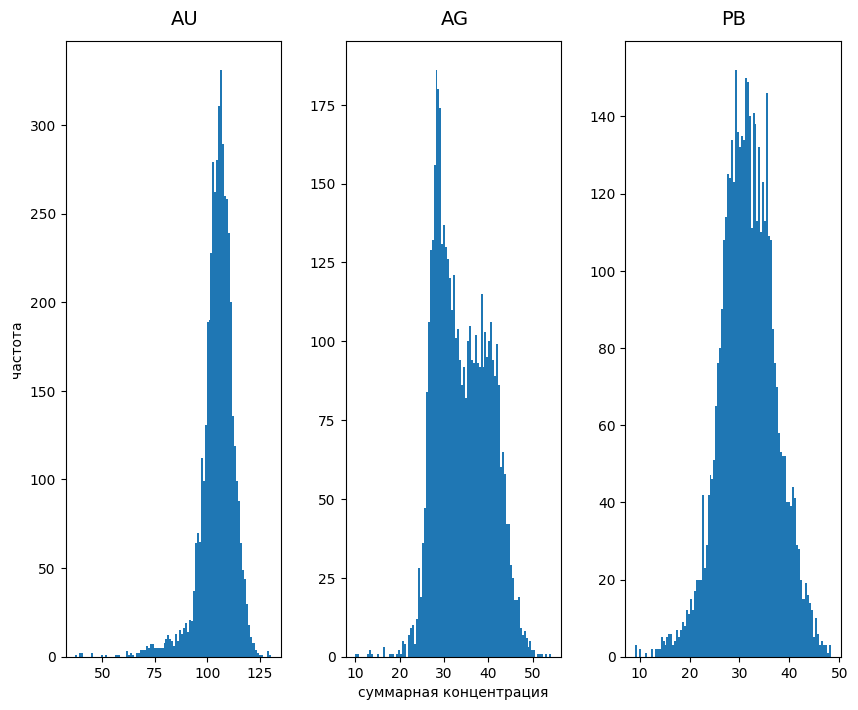

In [24]:
plt.figtext(0.23, 0.9, 'AU', fontsize=14)
plt.subplot(1,3,1)
sum_conc_au.plot(kind='hist', bins=100, figsize=(10,8))
plt.ylabel('частота')
plt.subplots_adjust(wspace=0.3)

plt.figtext(0.5, 0.9, 'AG', fontsize=14)
plt.subplot(1,3,2)
sum_conc_ag.plot(kind='hist', bins=100, figsize=(10,8))
plt.xlabel("суммарная концентрация")
plt.ylabel('')

plt.figtext(0.78, 0.9, 'PB', fontsize=14)
plt.subplot(1,3,3)
sum_conc_pb.plot(kind='hist', bins=100, figsize=(10,8))
plt.ylabel('')

Графики, в общем и целом, похожи на нормальное распредление, но у серебра есть особенность - не слишком ярко выраженный пик, рядом с ним очень много значений, "догоняющих его", золота и свинца все немного проще. Средняя суммарная концентрация золота примерно в пять раз больше чем аналогичная сумма у серебра, у свинца

## Модель

### Функции для подсчета sMAPE

    Промежуточная

In [25]:
def sMAPE(target, predict):
    
    top = np.abs(target-predict)
    bot = (np.abs(target)+np.abs(predict))/2
        
    return np.mean(top/bot)*100

    Итоговая

In [26]:
def FINAL_sMAPE(rougher, final):
    res = 0.25*rougher + 0.75*final
    return res

### Обучим модeли 

In [27]:
features = gold_train[gold_test.columns]
target_final = gold_train['final.output.recovery']
target_rougher = gold_train['rougher.output.recovery']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=state)

In [28]:
scaler = StandardScaler()

features = scaler.fit_transform(features)

features = shuffle(features, random_state=state)
target_final = shuffle(target_final, random_state=state)
target_rougher = shuffle(target_rougher, random_state=state)

Находим целевые признаки final.output.recovery и 'rougher.output.recovery' по очереди 

In [29]:
model_linear = LinearRegression()

my_scorer = make_scorer(sMAPE, greater_is_better=False)
scores_final = cross_val_score(estimator=model_linear, X=features,
                         y=target_final, scoring=my_scorer, cv=5)

scores_rougher = cross_val_score(estimator=model_linear, X=features,
                         y=target_rougher, scoring=my_scorer, cv=5)

print(scores_final.mean()*(-1))
scores_rougher.mean()*(-1)

7.384522208689451


4.155764076445311

Находим лучшие показатели для final.output.recovery с помощью РЕШАЮЩЕГО ДЕРЕВА

In [30]:
dec_tree_min = 100
min_depth_DT_f = 0 
for depth in range(1,20):
    model_dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=state)
    
    scores_final = cross_val_score(estimator=model_dec_tree, X=features,
                            y=target_final, scoring=my_scorer, cv=5)
    print(depth, scores_final.mean()*(-1))

1 8.299227335210357
2 7.985600096955247
3 7.616482589166455
4 7.4152985743593955
5 7.208310057961548
6 6.965520468423175
7 6.894307809433704
8 6.867393921807749
9 6.899792944569432
10 6.924363406689075
11 6.90566778877074
12 6.879910971737829
13 6.930731280132315
14 7.0423806984341555
15 7.0155981343299585
16 7.091343659796098
17 7.128718833785529
18 7.150607436450864
19 7.158312142218378


Находим лучшие показатели для rougher.output.recovery с помощью РЕШАЮЩЕГО ДЕРЕВА

In [31]:
dec_tree_min = 100
min_depth_DT_r = 0 
for depth in range(1,20):
    model_dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=state)
    
    scores_rougher = cross_val_score(estimator=model_dec_tree, X=features,
                        y=target_rougher, scoring=my_scorer, cv=5)
    print(depth, scores_rougher.mean()*(-1))

1 5.717022943432166
2 4.965211407697382
3 4.618308310391401
4 4.228882424238134
5 4.029219308997544
6 3.792687515270731
7 3.597579894004263
8 3.4420436208658614
9 3.327597252010618
10 3.2351051481038007
11 3.1936785479517757
12 3.155613118671422
13 3.1227698738865204
14 3.118163697877618
15 3.125331435342987
16 3.155624970557761
17 3.1751894287866196
18 3.1954571816887247
19 3.2178526342926688


Находим лучшие показатели для final.output.recovery с помощью СЛУЧАЙНОГО ЛЕСА

In [32]:
est_min_RF_f = 0 
depth_min_RF_f = 0
our_min = 100
for est in [25,50]:
    for depth in [5,10]:
        model_rnd_forest = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=state, n_jobs=-1)
        
        scores_final = cross_val_score(estimator=model_rnd_forest, X=features,
                                       y=target_final, scoring=my_scorer, cv=5)
        print(est, depth, scores_final.mean()*(-1))
        if scores_final.mean()*(-1)<our_min:
            our_min = scores_final.mean()*(-1)
            est_min_RF_f = est
            depth_min_RF_f = depth
print(est_min_RF_f, depth_min_RF_f, our_min)

25 5 6.86380569186816
25 10 5.936940978467357
50 5 6.874106719132928
50 10 5.902903060383813
50 10 5.902903060383813


Находим лучшие показатели для rougher.output.recovery с помощью СЛУЧАЙНОГО ЛЕСА

In [33]:
est_min_RF_r = 0 
depth_min_RF_r = 0
our_min = 100
for est in [25,50]:
    for depth in [5,10]:
        model_rnd_forest = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=state, n_jobs=-1)
        
        scores_rougher = cross_val_score(estimator=model_rnd_forest, X=features,
                                       y=target_rougher, scoring=my_scorer, cv=5)
        print(est, depth, scores_rougher.mean()*(-1))
        if scores_rougher.mean()*(-1)<our_min:
            our_min = scores_rougher.mean()*(-1)
            est_min_RF_r = est
            depth_min_RF_r = depth
print(est_min_RF_r, depth_min_RF_r, our_min)

25 5 3.6762036001601373
25 10 2.705811597890245
50 5 3.665257026575312
50 10 2.6943337800102674
50 10 2.6943337800102674


## Тест и выводы

### Тест

* Для теста я решил создать отдельные переменные, чтобы не запутаться

In [34]:
features = gold_train[gold_test.columns]
target_final = gold_train['final.output.recovery']
target_rougher = gold_train['rougher.output.recovery']
test_final = test_target['final.output.recovery']
test_rougher = test_target['rougher.output.recovery']

Переменная test_target - результаты для тестовой выборки, полученные исключение тренировчных индексов из общего датасета

Для целевого признака final.output.recovery наилучшим образом себя проявил СЛУЧАНЫЙ ЛЕС с гиперпараметрами
* количество деревье - 45 
* количество ветвей - 6

Сетка для нахождения параметров: 25-49 для поиска деревьев, 5-10 для поиска ветвей 

In [35]:
model = RandomForestRegressor(max_depth=depth_min_RF_f, n_estimators=est_min_RF_f, random_state=state, n_jobs=-1)
model.fit(features, target_final)
result_final = model.predict(gold_test)

* Получаем sMAPE оценку для предсказанных значений столбца final.output.recovery

In [36]:
f_smape = sMAPE(result_final, test_final)
f_smape

6.825815283052113

Для целевого признака rougher.output.recovery наилучшим образом себя проявил СЛУЧАНЫЙ ЛЕС с гиперпараметрами
* количество деревье - 31 
* количество ветвей - 9

Сетка для нахождения параметров: 25-49 для поиска деревьев, 5-10 для поиска ветвей 

In [37]:
model = RandomForestRegressor(max_depth=depth_min_RF_r, n_estimators=est_min_RF_r, random_state=state, n_jobs=-1)
model.fit(features, target_rougher)
result_rougher = model.predict(gold_test)

* Получаем sMAPE оценку для предсказанных значений столбца rougher.output.recovery

In [38]:
r_smape = sMAPE(result_rougher, test_rougher)
r_smape

3.073299026734325

* Получаем итоговую sMAPE оцекну для двух пресказанных значений

In [39]:
end_smape = FINAL_sMAPE(r_smape, f_smape)
end_smape

5.887686218972666

Проверим полученное нами значение итоговой метрики на адекватность 

Сравним его с результами, полученными при сравнении результатов со средним значение

In [40]:
avg_fin = gold_train['final.output.recovery'].mean()
avg_fin = pd.Series(avg_fin, index=test_final.index)

In [41]:
avg_roug = gold_train['rougher.output.recovery'].mean()
avg_roug = pd.Series(avg_roug, index=test_rougher.index)

In [42]:
FINAL_sMAPE(sMAPE(test_rougher, avg_roug), sMAPE(test_final, avg_fin))

8.386347014441817

### Вывод

Результат итоговой метрики sMAPE для предсказанных значений более чем на 2% лучше, чем для случайных, вполне возможно, перебирая дальше оптимальные показатели случайного леса, результат был бы еще лучше, но по итогу мы имее, что наша модель предсказывает значения с погрешность в среднем равному чуть меньше 6%, это означает что ответ, предсказанный модель лежит в пределеах +-6% от реального значения

ВЫВОД: При помощи данной модели можно предсказывать эффективность обогащения чернового концентрата и эффективность обогащения финального концентрата, что в свою очередь поможет команде тщательнее отбирать исходное сырье и при правильной трактовке результатов можем повлечь за собой прибыль 